In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing


In [2]:
df1 = pd.read_csv('Downloads/covid19/full_grouped.csv')
df2 = pd.read_csv('Downloads/covid19/worldometer_data.csv')

In [3]:
# Merge based on a common column (e.g., 'Country/Region')
df = df2.merge(df1[['Country/Region', 'Date']], on='Country/Region', how='left')
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Date
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,NaN
1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-22
2,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-23
3,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-24
4,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-25


In [4]:
# handling missing data

In [5]:
df.dropna(subset =['Continent', 'Population', 'WHO Region','Date' ])
df.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Date
0,USA,North America,331198130.0,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,NaN
1,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-22
2,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-23
3,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-24
4,Brazil,South America,212710692.0,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-25


In [6]:
 df_fill=df.fillna({ 
    'NewCases':0,
       'TotalDeaths':0, 
    'NewDeaths':0, 
    'TotalRecovered':0, 
    'NewRecovered':0,
       'ActiveCases':0, 
    'Serious,Critical':0,
    'Tot Cases/1M pop':0,
    'Deaths/1M pop':0,
       'TotalTests':0, 
    'Tests/1M pop':0, })
df_fill.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Date
0,USA,North America,331198130.0,5032179,0.0,162804.0,0.0,2576668.0,0.0,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas,NaN
1,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-22
2,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-23
3,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-24
4,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-25


In [7]:
#change date column from object to date
df_fill['Date'] = pd.to_datetime(df_fill['Date'])
df_fill['Date'] = pd.to_datetime(df_fill['Date'], errors='coerce')
df_fill.dtypes

Country/Region              object
Continent                   object
Population                 float64
TotalCases                   int64
NewCases                   float64
TotalDeaths                float64
NewDeaths                  float64
TotalRecovered             float64
NewRecovered               float64
ActiveCases                float64
Serious,Critical           float64
Tot Cases/1M pop           float64
Deaths/1M pop              float64
TotalTests                 float64
Tests/1M pop               float64
WHO Region                  object
Date                datetime64[ns]
dtype: object

In [8]:
df_fill.duplicated().sum()

0

In [9]:
df_d = df_fill.drop_duplicates()

In [10]:
df_d.duplicated().sum()

0

In [11]:
df_d.shape

(32186, 17)

In [12]:
# feature engineering
# daily growth rate
df_d['daily_growth_rate'] = df_d['NewCases'] / (df_d['TotalCases'] - df_d['NewCases'])
# mortality ratio
df_d['mortality_ratio'] = df_d['TotalDeaths'] / df_d['TotalCases']
# cases per population
df_d['cases_per_population'] = df_d['TotalCases'] / df_d['Population']

In [13]:
df_d.dropna(subset=['Continent', 'Population','WHO Region','cases_per_population','Date'])

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region,Date,daily_growth_rate,mortality_ratio,cases_per_population
1,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-22,0.0,0.03381,0.013716
2,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-23,0.0,0.03381,0.013716
3,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-24,0.0,0.03381,0.013716
4,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-25,0.0,0.03381,0.013716
5,Brazil,South America,212710692.0,2917562,0.0,98644.0,0.0,2047660.0,0.0,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas,2020-01-26,0.0,0.03381,0.013716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32181,Western Sahara,Africa,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa,2020-07-23,0.0,0.10000,0.000017
32182,Western Sahara,Africa,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa,2020-07-24,0.0,0.10000,0.000017
32183,Western Sahara,Africa,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa,2020-07-25,0.0,0.10000,0.000017
32184,Western Sahara,Africa,598682.0,10,0.0,1.0,0.0,8.0,0.0,1.0,0.0,17.0,2.0,0.0,0.0,Africa,2020-07-26,0.0,0.10000,0.000017


In [14]:
df_d.set_index('Date', inplace=True)

In [15]:
df_d.describe()

,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,daily_growth_rate,mortality_ratio,cases_per_population
count,3.218500e+04,3.218600e+04,32186.000000,32186.000000,32186.000000,3.218600e+04,32186.000000,3.218600e+04,32186.000000,32186.000000,32186.000000,3.218600e+04,32186.000000,32186.000000,32186.000000,32185.000000
mean,3.298752e+07,8.010290e+04,46.156590,2940.528646,5.251134,5.485319e+04,29.650469,1.965470e+04,273.508513,3125.646585,89.744785,1.046724e+06,63690.466818,0.000361,0.030086,0.003126
std,1.120507e+08,2.889715e+05,511.026919,10130.418341,62.672787,2.026484e+05,323.039793,7.955146e+04,1070.904287,5124.245412,171.252290,3.193916e+06,125197.764760,0.002919,0.033615,0.005124
min,8.010000e+02,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000003
25%,2.356075e+06,1.208000e+03,0.000000,22.000000,0.000000,7.450000e+02,0.000000,2.010000e+02,0.000000,268.000000,5.000000,1.844300e+04,5965.000000,0.000000,0.011027,0.000268
50%,9.449001e+06,6.375000e+03,0.000000,125.000000,0.000000,3.463000e+03,0.000000,1.242000e+03,3.000000,1000.000000,20.000000,1.490000e+05,25205.000000,0.000000,0.021931,0.001000
75%,2.918649e+07,4.524400e+04,0.000000,1026.000000,0.000000,2.927500e+04,0.000000,9.377000e+03,52.000000,3999.000000,88.000000,7.945440e+05,68631.000000,0.000000,0.037430,0.003999
max,1.381345e+09,5.032179e+06,6590.000000,162804.000000,819.000000,2.576668e+06,4140.000000,2.292707e+06,18296.000000,39922.000000,1238.000000,6.313960e+07,995282.000000,0.032328,0.287330,0.039922


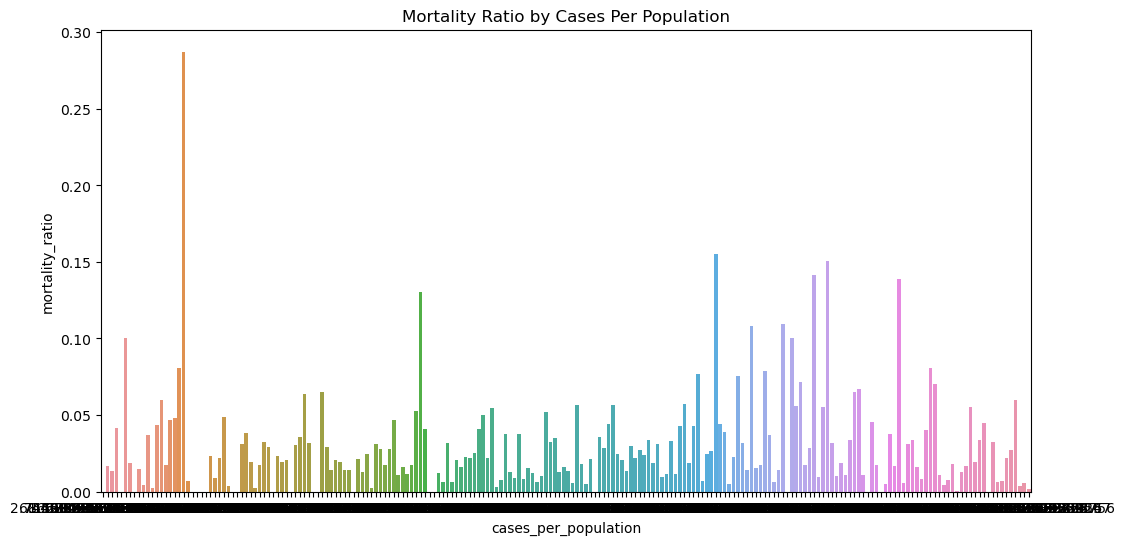

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='cases_per_population', y='mortality_ratio',data= df_d)
plt.title("Mortality Ratio by Cases Per Population")
plt.show()


In [17]:
df_d.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region', 'daily_growth_rate',
       'mortality_ratio', 'cases_per_population'],
      dtype='object')

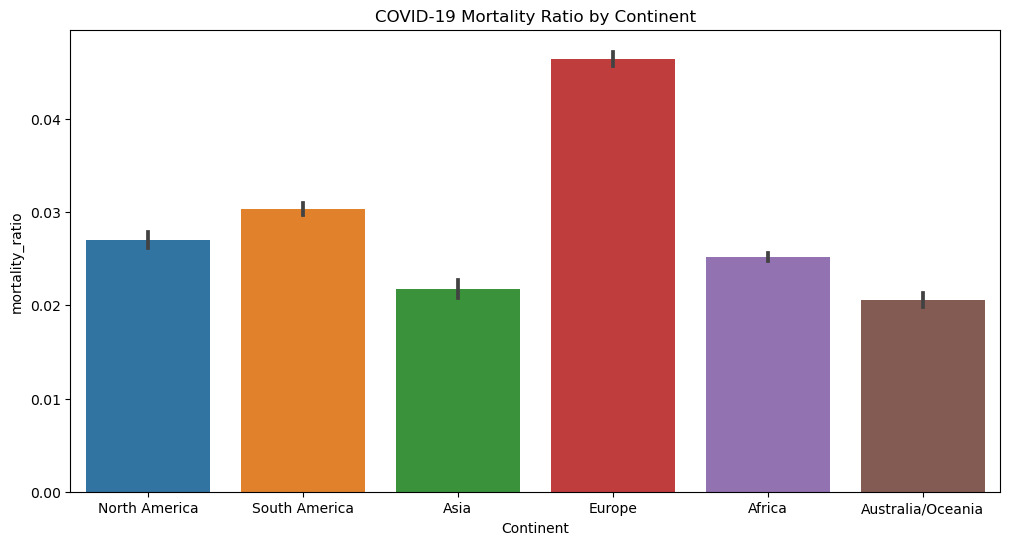

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Continent', y='mortality_ratio',data= df_d)
plt.title("COVID-19 Mortality Ratio by Continent")
plt.show()

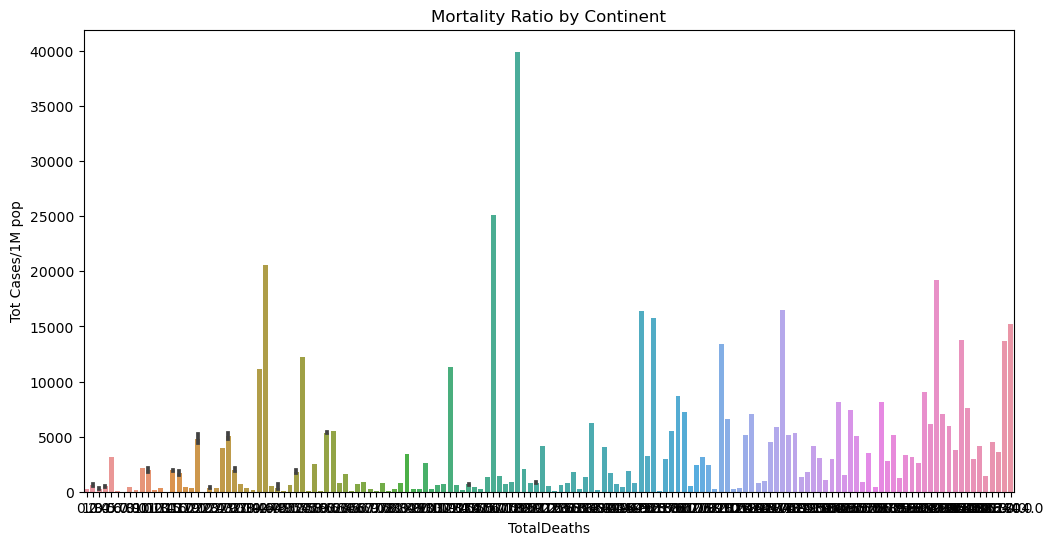

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalDeaths', y='Tot Cases/1M pop',data= df_d)
plt.title("Mortality Ratio by Continent")
plt.show()

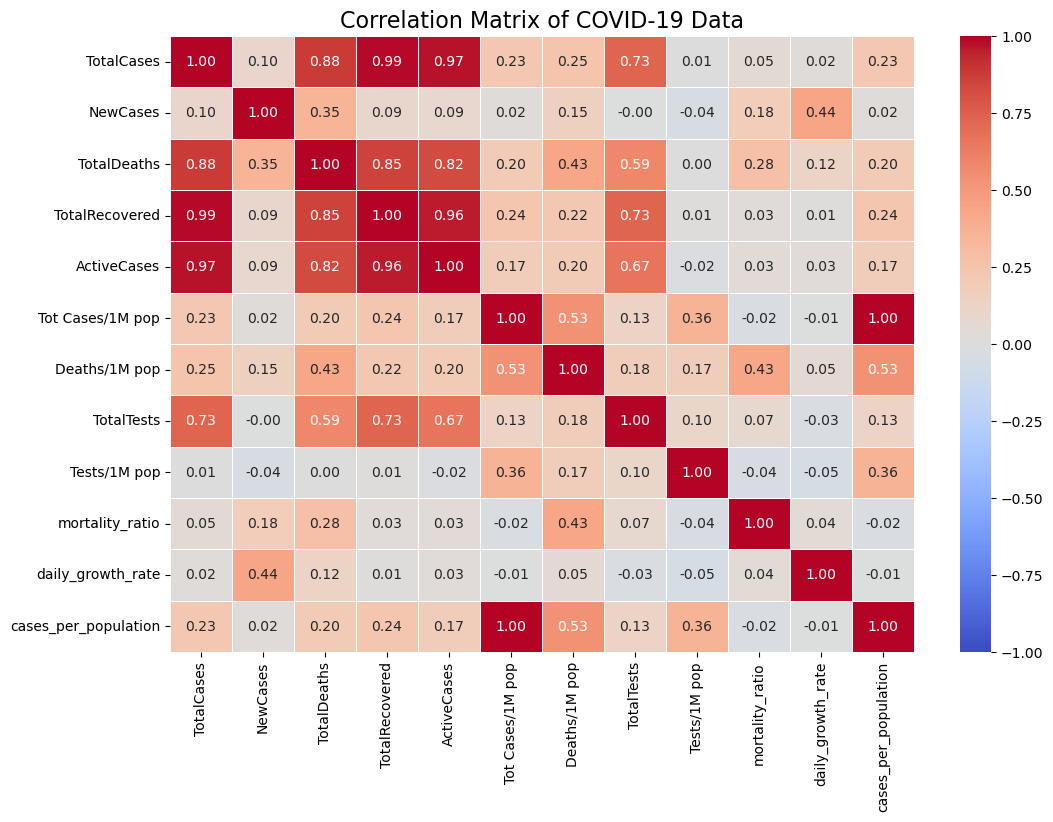

In [20]:
# Select the numerical columns to compute the correlation matrix
numerical_columns = ['TotalCases', 'NewCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases',
                     'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'mortality_ratio', 
                     'daily_growth_rate', 'cases_per_population']

# Calculate the correlation matrix
corr_matrix = df_d[numerical_columns].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Adding title and labels
plt.title('Correlation Matrix of COVID-19 Data', fontsize=16)
plt.show()

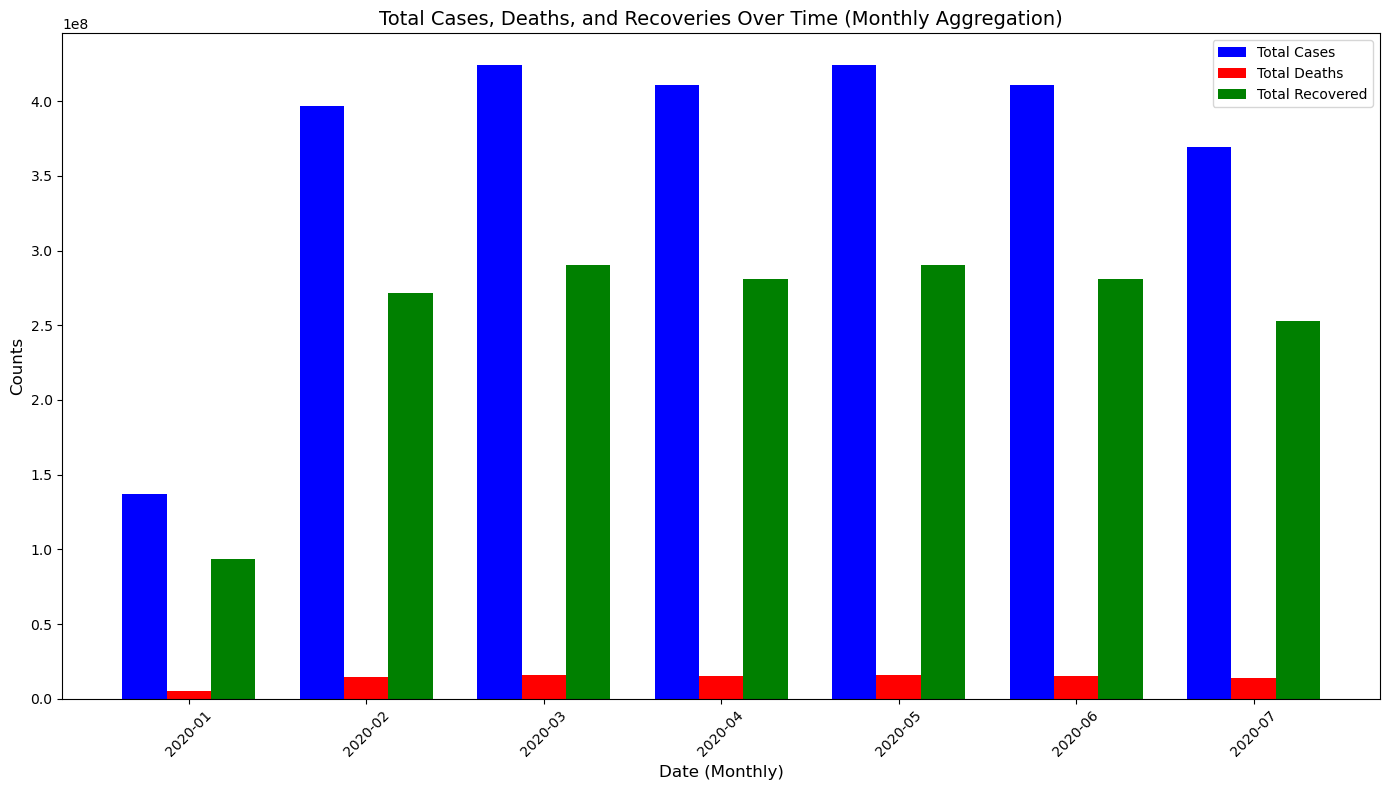

In [25]:
# visualizing cases over time

# Assuming your data is already indexed by 'Date'
# Example of aggregation by month
df_aggregated = df_d.resample('M').sum()  # Resample to monthly data and sum up

# Create a bar plot
plt.figure(figsize=(14, 8))

# Plot the data
bar_width = 0.25
index = range(len(df_aggregated.index))

plt.bar(index, df_aggregated['TotalCases'], bar_width, label='Total Cases', color='blue')
plt.bar([i + bar_width for i in index], df_aggregated['TotalDeaths'], bar_width, label='Total Deaths', color='red')
plt.bar([i + 2 * bar_width for i in index], df_aggregated['TotalRecovered'], bar_width, label='Total Recovered', color='green')

# Customizing the plot
plt.xlabel('Date (Monthly)', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Total Cases, Deaths, and Recoveries Over Time (Monthly Aggregation)', fontsize=14)
plt.xticks([i + bar_width for i in index], df_aggregated.index.strftime('%Y-%m'), rotation=45)
plt.legend()

plt.tight_layout()
plt.show()



In [23]:
# Define target and features
df_d['HighMortality'] = (df_d['mortality_ratio'] > 0.05).astype(int)  # Binary classification
X = df_d[['TotalCases', 'ActiveCases', 'TotalRecovered', 'TotalTests']].fillna(0)
y = df_d['HighMortality']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


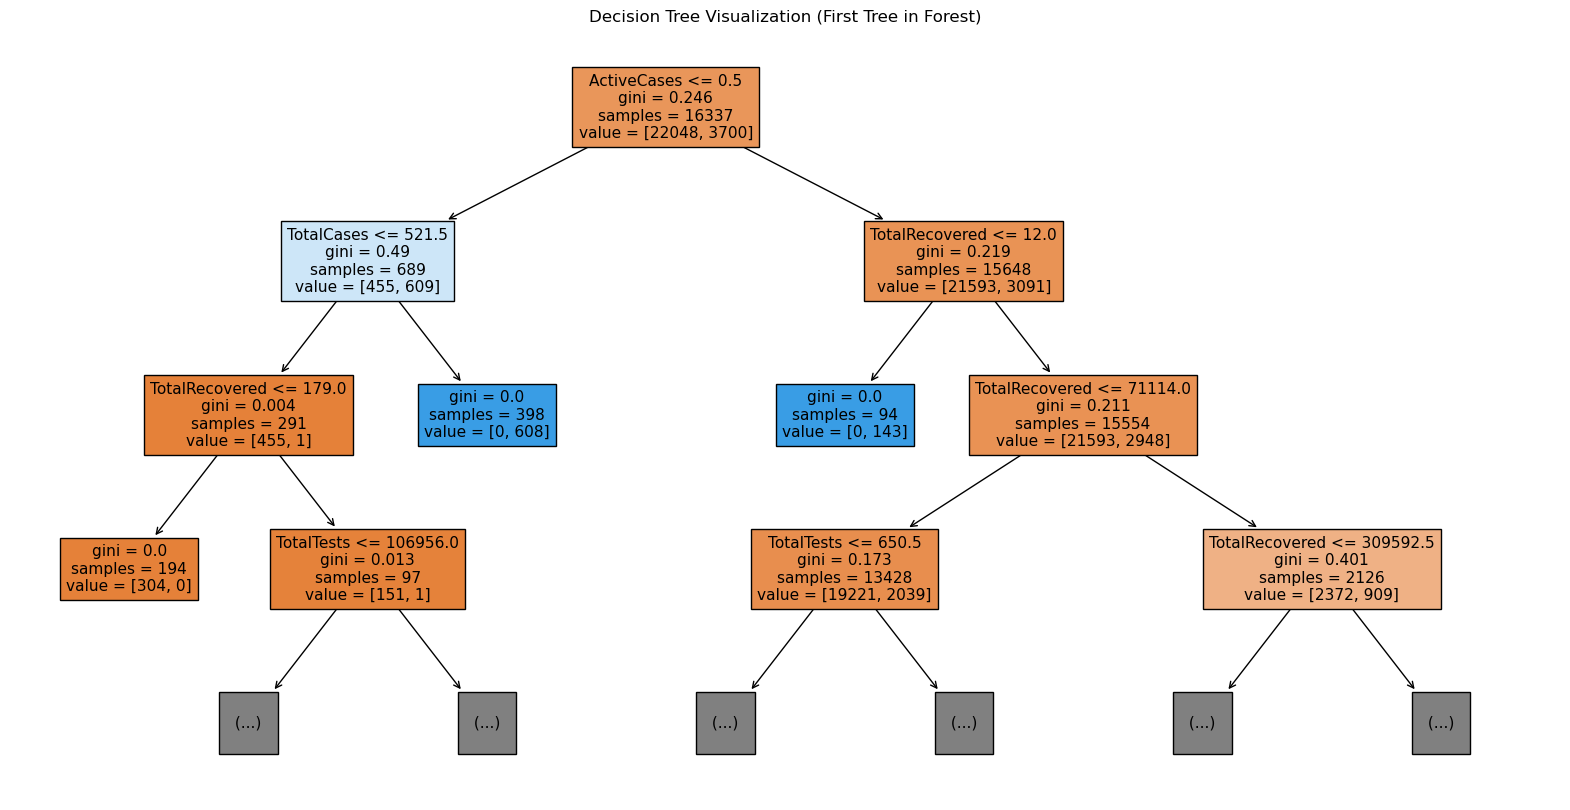

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Visualize the first tree in the forest
plt.figure(figsize=(20, 10))
plot_tree(rf.estimators_[0], filled=True, feature_names=X_train.columns.tolist(), max_depth=3)
plt.title('Decision Tree Visualization (First Tree in Forest)')
plt.show()


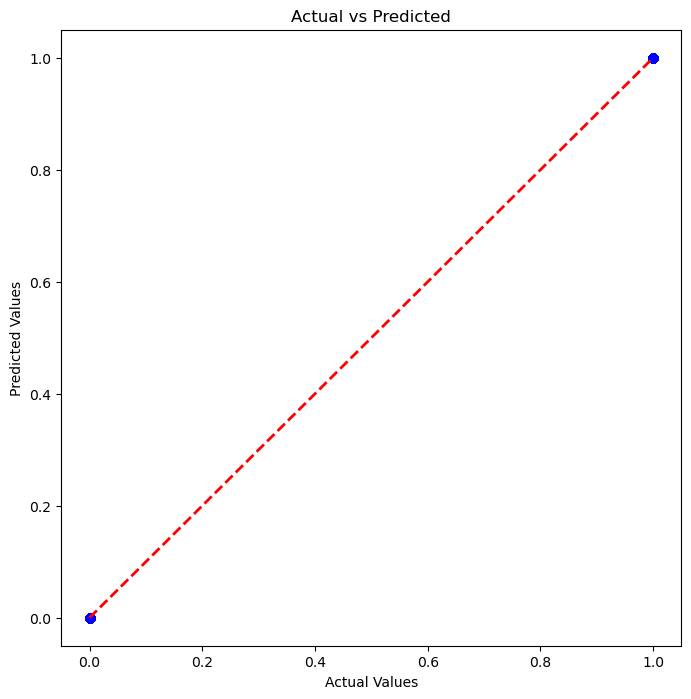

Mean Absolute Error: 0.0


In [27]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Assuming y_test is the actual values and y_pred is the predicted values
y_pred = rf.predict(X_test)

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()

# Print performance metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")


C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\USER\anaconda3\Lib\site-packa

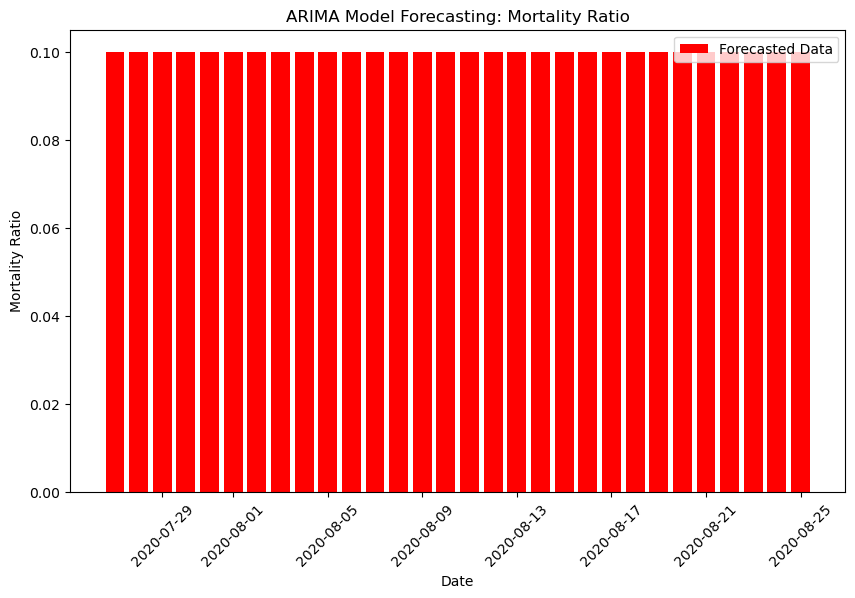

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Select the target variable for time series forecasting
data = df_d['mortality_ratio']

# Fit ARIMA model (p, d, q) hyperparameters can be tuned
model = ARIMA(data, order=(5, 1, 0))  # Example parameters
model_fit = model.fit()

# Make forecast for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the forecast as a bar plot
plt.figure(figsize=(10,6))
plt.bar(pd.date_range(data.index[-1], periods=30, freq='D'), forecast, color='red', label='Forecasted Data')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Mortality Ratio')
plt.legend()
plt.title('ARIMA Model Forecasting: Mortality Ratio')
plt.show()
